<a href="https://colab.research.google.com/github/abhishakvarshney/Predicting-House-Prices-In-Bengaluru/blob/master/Predicting_House_Prices_In_Bengaluru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

from tqdm import tqdm
from sklearn import preprocessing

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def rmsle(y_pred, y_actual):
    error = np.square(np.log10(y_pred +1) - np.log10(y_actual +1)).mean() ** 0.5
    print(":::y_pred rmsle",(np.log10(y_pred +1) - np.log10(y_actual +1)))
    print(":::::y_actual rsmle")
    print(":::error", error)
    acc = 1 - error
    return acc, error


def visualize_train_predict_result(x_train, y_train, y_pred_train):
    # Visualising the Training set results
    plt.scatter(X_train, y_train, color = 'red')
    plt.plot(X_train, y_pred_train, color = 'blue')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()


def visualize_test_predict_result(x_train, y_train, x_test, y_pred):
    # Visualising the Test set results
    plt.scatter(X_train, y_train, color = 'red')
    plt.plot(X_test, y_pred, color = 'blue')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()


def train_model(regressor, x_train, x_test, y_train, y_test):
    regressor.fit(x_train, y_train)
    y_train = y_train.to_numpy()
    y_test = y_test.to_numpy()
    print("numpy array conversion successfull")
    y_pred_train = regressor.predict(x_train)
    print("predicted y train")
    y_pred = regressor.predict(x_test)
    train_rmsle_accuracy, train_rmsle_error = rmsle(y_pred_train, y_train)
    validation_rmsle_accuracy, validation_rmsle_error = rmsle(y_pred,y_test)
    print("Predicted Data Shape::", y_pred_train.shape, y_pred.shape)
    print("On Training Set = \n Accuracy attained: {}\n Error: {}".format(train_rmsle_accuracy, train_rmsle_error))
    print("On Validation Set = \n Accuracy attained: {}\n Error: {}".format(validation_rmsle_accuracy, validation_rmsle_error))
    # visualize_train_predict_result(X_train, y_train, y_pred_train)
    # visualize_test_predict_result(X_train, y_train, X_validate, y_pred)
    return y_pred

In [3]:
dataset = pd.read_csv('/content/Predicting-House-Prices-In-Bengaluru-Train-Data.csv')
dataset_test = pd.read_csv('/content/Predicting-House-Prices-In-Bengaluru-Test-Data.csv')

In [4]:
dataset.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [5]:
dataset_test.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Ready To Move,Brookefield,2 BHK,Roeekbl,1225,2.0,2.0,NaN
1,Plot Area,Ready To Move,Akshaya Nagar,9 Bedroom,NaN,2400,9.0,2.0,NaN
2,Plot Area,18-Apr,Hennur Road,4 Bedroom,Saandtt,1650,5.0,2.0,NaN
3,Super built-up Area,Ready To Move,Kodichikkanahalli,3 BHK,Winerri,1322,3.0,1.0,NaN
4,Super built-up Area,Ready To Move,Konanakunte,2 BHK,AmageSa,1161,2.0,1.0,NaN
5,Plot Area,Ready To Move,5th Phase JP Nagar,4 Bedroom,NaN,760,3.0,1.0,NaN
6,Built-up Area,Ready To Move,Vijayanagar,4 Bedroom,NaN,4500,4.0,1.0,NaN
7,Built-up Area,Ready To Move,BEML Layout,2 BHK,G aceer,960,2.0,0.0,NaN
8,Super built-up Area,Ready To Move,Thanisandra,3 BHK,Soitya,1569,3.0,1.0,NaN
9,Built-up Area,Ready To Move,NRI Layout,3 BHK,NaN,2400,4.0,NaN,NaN


In [6]:
print(f"Dataset has {dataset.shape[0]} rows and {dataset.shape[1]} columns.")
print(f"Test Dataset has {dataset_test.shape[0]} rows and {dataset_test.shape[1]} columns.")

Dataset has 13320 rows and 9 columns.
Test Dataset has 1480 rows and 9 columns.


In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13320 non-null  object 
 3   total_sqft    13320 non-null  float64
 4   bath          13320 non-null  float64
 5   balcony       13320 non-null  float64
 6   price         13320 non-null  float64
 7   kitchen       13320 non-null  float64
 8   hall          13320 non-null  float64
 9   bedroom       13320 non-null  float64
dtypes: float64(7), object(3)
memory usage: 1.0+ MB


In [31]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     1480 non-null   object 
 1   availability  1480 non-null   object 
 2   location      1480 non-null   object 
 3   total_sqft    1480 non-null   float64
 4   bath          1480 non-null   float64
 5   balcony       1480 non-null   float64
 6   price         0 non-null      float64
 7   kitchen       1480 non-null   float64
 8   hall          1480 non-null   float64
 9   bedroom       1480 non-null   float64
dtypes: float64(7), object(3)
memory usage: 115.8+ KB


In [9]:
dataset['total_sqft'] = dataset['total_sqft'].apply(lambda x: str(sum([float(i) for i in x.split(' - ')])/2) if '-' in x else "".join(i for i in x if i.isdigit() or i in['.']).rstrip('.'))
dataset['total_sqft'] = dataset['total_sqft'].astype('float')
dataset_test['total_sqft'] = dataset_test['total_sqft'].apply(lambda x: str(sum([float(i) for i in x.split(' - ')])/2) if '-' in x else "".join(i for i in x if i.isdigit() or i in['.']).rstrip('.'))
dataset_test['total_sqft'] = dataset_test['total_sqft'].astype('float')

In [10]:
dataset['kitchen'] =  dataset['size'].apply(lambda x: np.nan if type(x) == float else 1 if 'K' in x else 0)
dataset['hall'] =  dataset['size'].apply(lambda x: np.nan if type(x) == float else 1 if 'H' in x else 0)
dataset['bedroom'] = dataset['size'].apply(lambda x: np.nan if type(x) == float else "".join(i for i in x if i.isdigit() or i in ["."]))
dataset['bedroom'] = dataset['bedroom'].astype(float)
# dataset = dataset[['area_type', 'total_sqft', 'bath', 'balcony', 'price', 'kitchen', 'hall', 'bedroom']]
dataset_test['kitchen'] =  dataset_test['size'].apply(lambda x: np.nan if type(x) == float else 1 if 'K' in x else 0)
dataset_test['hall'] =  dataset_test['size'].apply(lambda x: np.nan if type(x) == float else 1 if 'H' in x else 0)
dataset_test['bedroom'] = dataset_test['size'].apply(lambda x: np.nan if type(x) == float else "".join(i for i in x if i.isdigit() or i in ["."]))
dataset_test['bedroom'] = dataset_test['bedroom'].astype(float)

In [11]:
dataset['availability'] = dataset['availability'].apply(lambda x: x if '-' not in x else x.split('-')[-1])
dataset_test['availability'] = dataset_test['availability'].apply(lambda x: x if '-' not in x else x.split('-')[-1])

In [12]:
dataset = dataset.drop(['size', 'society'], axis=1)
dataset.head(5)

,area_type,availability,location,total_sqft,bath,balcony,price,kitchen,hall,bedroom
0,Super built-up Area,Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,1.0,1.0,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,0.0,0.0,4.0
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,1.0,1.0,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,1.0,1.0,3.0
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,1.0,1.0,2.0


In [13]:
dataset_test = dataset_test.drop(['size', 'society'], axis=1)
dataset_test.head(5)

,area_type,availability,location,total_sqft,bath,balcony,price,kitchen,hall,bedroom
0,Super built-up Area,Ready To Move,Brookefield,1225.0,2.0,2.0,NaN,1.0,1.0,2.0
1,Plot Area,Ready To Move,Akshaya Nagar,2400.0,9.0,2.0,NaN,0.0,0.0,9.0
2,Plot Area,Apr,Hennur Road,1650.0,5.0,2.0,NaN,0.0,0.0,4.0
3,Super built-up Area,Ready To Move,Kodichikkanahalli,1322.0,3.0,1.0,NaN,1.0,1.0,3.0
4,Super built-up Area,Ready To Move,Konanakunte,1161.0,2.0,1.0,NaN,1.0,1.0,2.0


In [14]:
#check nulls..
dataset.isnull().sum()

area_type         0
availability      0
location          1
total_sqft        0
bath             73
balcony         609
price             0
kitchen          16
hall             16
bedroom          16
dtype: int64

In [15]:
dataset_test.isnull().sum()

area_type          0
availability       0
location           0
total_sqft         0
bath               7
balcony           69
price           1480
kitchen            2
hall               2
bedroom            2
dtype: int64

In [16]:
dataset['location'].value_counts()

Whitefield               540
Sarjapur  Road           399
Electronic City          302
Kanakpura Road           273
Thanisandra              234
                        ... 
Asthagrama Layout          1
Maruthi HBCS Layout        1
Raja Rajashweri Nagar      1
Chambenahalli              1
Maruthi Extension          1
Name: location, Length: 1305, dtype: int64

In [17]:
dataset['location'] = dataset['location'].fillna(dataset['location'].value_counts().index[0])

In [18]:
dataset.describe()

,total_sqft,bath,balcony,price,kitchen,hall,bedroom
count,13320.000000,13247.000000,12711.000000,13320.000000,13304.000000,13304.000000,13304.000000
mean,1555.971707,2.692610,1.584376,112.565627,0.810207,0.809230,2.803743
std,1238.902448,1.341458,0.817263,148.971674,0.392152,0.392923,1.294974
min,1.000000,1.000000,0.000000,8.000000,0.000000,0.000000,1.000000
25%,1100.000000,2.000000,1.000000,50.000000,1.000000,1.000000,2.000000
50%,1275.000000,2.000000,2.000000,72.000000,1.000000,1.000000,3.000000
75%,1679.250000,3.000000,2.000000,120.000000,1.000000,1.000000,3.000000
max,52272.000000,40.000000,3.000000,3600.000000,1.000000,1.000000,43.000000


In [19]:
dataset_test.describe()

,total_sqft,bath,balcony,price,kitchen,hall,bedroom
count,1480.000000,1473.000000,1411.000000,0.0,1478.000000,1478.000000,1478.000000
mean,1546.608436,2.753564,1.562013,NaN,0.792963,0.791610,2.884980
std,808.339612,1.365218,0.835949,NaN,0.405319,0.406294,1.355159
min,5.000000,1.000000,0.000000,NaN,0.000000,0.000000,1.000000
25%,1109.750000,2.000000,1.000000,NaN,1.000000,1.000000,2.000000
50%,1300.500000,2.000000,2.000000,NaN,1.000000,1.000000,3.000000
75%,1718.750000,3.000000,2.000000,NaN,1.000000,1.000000,3.000000
max,8000.000000,16.000000,3.000000,NaN,1.000000,1.000000,16.000000


In [20]:
dataset.head(10)

,area_type,availability,location,total_sqft,bath,balcony,price,kitchen,hall,bedroom
0,Super built-up Area,Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,1.0,1.0,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,0.0,0.0,4.0
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,1.0,1.0,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,1.0,1.0,3.0
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,1.0,1.0,2.0
5,Super built-up Area,Ready To Move,Whitefield,1170.0,2.0,1.0,38.00,1.0,1.0,2.0
6,Super built-up Area,May,Old Airport Road,2732.0,4.0,NaN,204.00,1.0,1.0,4.0
7,Super built-up Area,Ready To Move,Rajaji Nagar,3300.0,4.0,NaN,600.00,1.0,1.0,4.0
8,Super built-up Area,Ready To Move,Marathahalli,1310.0,3.0,1.0,63.25,1.0,1.0,3.0
9,Plot Area,Ready To Move,Gandhi Bazar,1020.0,6.0,NaN,370.00,0.0,0.0,6.0


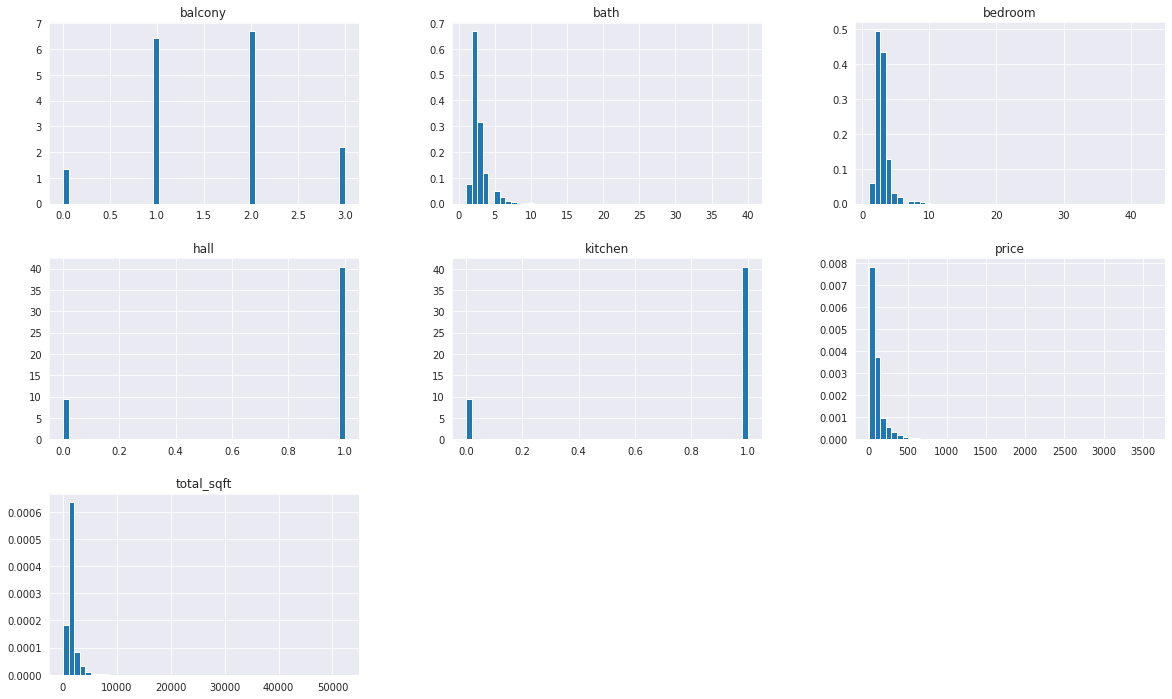

In [21]:
dataset.hist(bins=50, figsize=(20,12), density=True)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


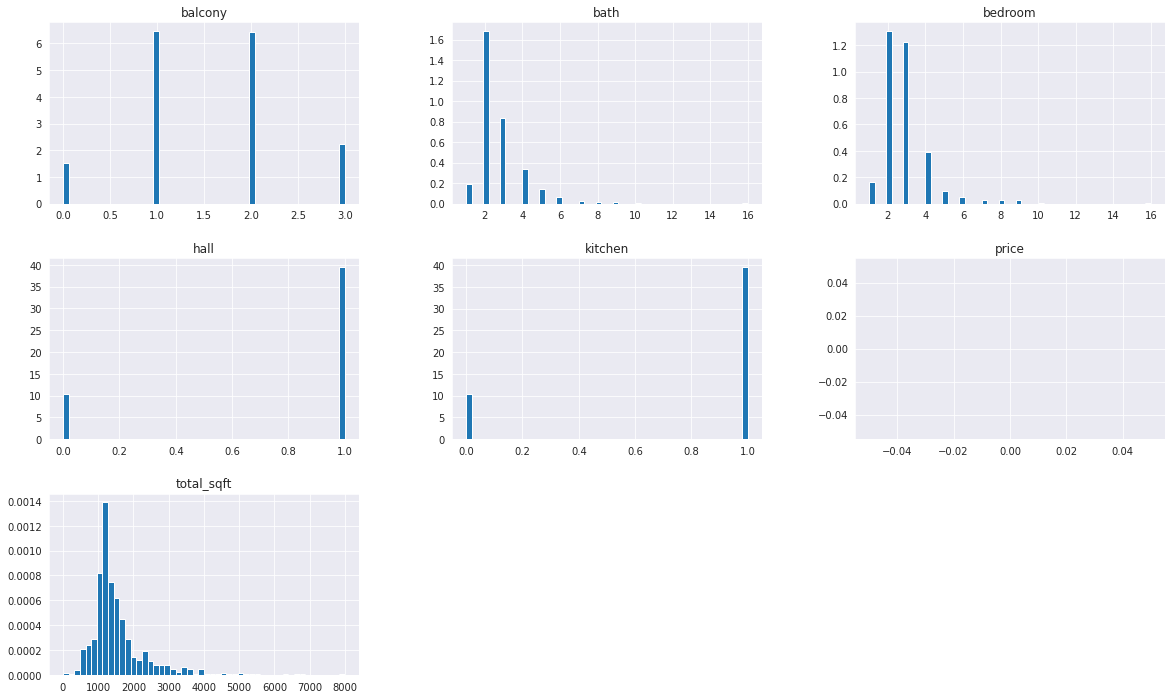

In [22]:
dataset_test.hist(bins=50, figsize=(20,12), density=True)
plt.show()

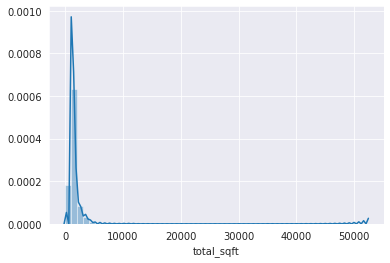

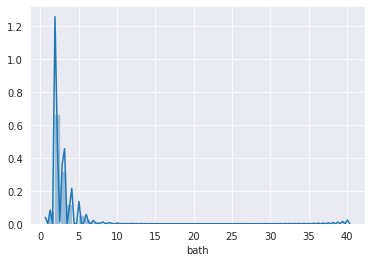

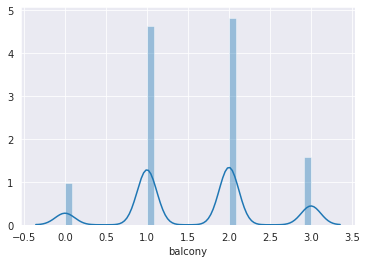

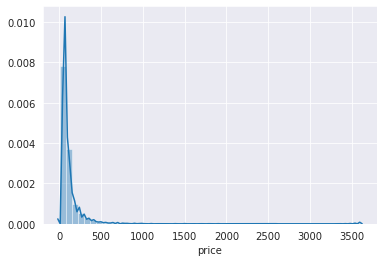

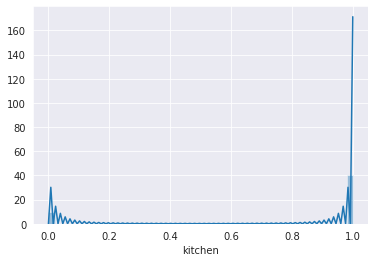

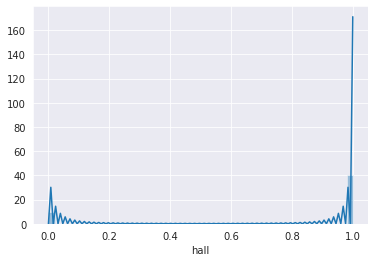

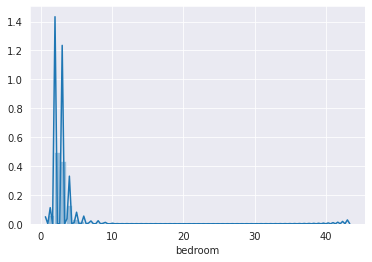

In [23]:
float_column = dataset.dtypes != object
float_column = dataset.columns[float_column].tolist()
for column in float_column:
    plt.figure()
    sns.distplot(dataset[column])

In [24]:
dataset.skew()

total_sqft    15.201668
bath           4.227697
balcony        0.005857
price          8.064469
kitchen       -1.582317
hall          -1.574238
bedroom        4.822009
dtype: float64

In [25]:
dataset_test.skew()

total_sqft    2.458184
bath          2.523591
balcony       0.018517
price              NaN
kitchen      -1.447553
hall         -1.437408
bedroom       2.554797
dtype: float64

In [26]:
from sklearn.impute import SimpleImputer
imputer_mean = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer_median = SimpleImputer(missing_values=np.nan, strategy="median")
imputer_mean = imputer_mean.fit(dataset[['kitchen', 'hall']])
imputer_median = imputer_median.fit(dataset[['bath', 'balcony', 'bedroom']])
dataset[['kitchen', 'hall']] = imputer_mean.transform(dataset[['kitchen', 'hall']])
dataset_test[['kitchen', 'hall']] = imputer_mean.transform(dataset_test[['kitchen', 'hall']])
dataset[['bath', 'balcony', 'bedroom']] = imputer_median.transform(dataset[['bath', 'balcony', 'bedroom']])
dataset_test[['bath', 'balcony', 'bedroom']] = imputer_median.transform(dataset_test[['bath', 'balcony', 'bedroom']])
dataset.isnull().sum()

area_type       0
availability    0
location        0
total_sqft      0
bath            0
balcony         0
price           0
kitchen         0
hall            0
bedroom         0
dtype: int64

In [27]:
dataset_test.isnull().sum()

area_type          0
availability       0
location           0
total_sqft         0
bath               0
balcony            0
price           1480
kitchen            0
hall               0
bedroom            0
dtype: int64

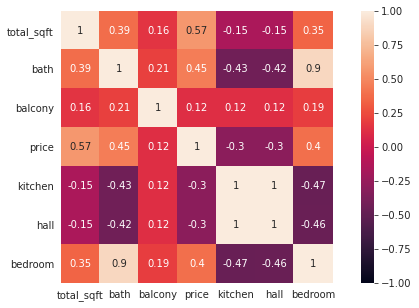

In [28]:
corrmat = dataset.corr()
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(corrmat, vmax=1,vmin=-1, square=True, annot=True);

In [29]:
X = dataset.loc[:, dataset.columns != 'price']
Y = dataset.loc[:,['price']]
X.head()
X_test = dataset_test.loc[:, dataset_test.columns != 'price']

In [30]:
Y.head()

,price
0,39.07
1,120.00
2,62.00
3,95.00
4,51.00


In [37]:
# Categorical boolean mask
categorical_feature_mask = X.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = X.columns[categorical_feature_mask].tolist()

In [42]:
le = preprocessing.LabelEncoder()
# apply le on categorical feature columns
X[categorical_cols].apply(lambda col: le.fit(col))
print(le.classes_)
X[categorical_cols] = X[categorical_cols].apply(lambda col: le.transform(col))
X.head(10)

[   0    1    2 ... 1302 1303 1304]


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,area_type,availability,location,total_sqft,bath,balcony,kitchen,hall,bedroom
0,3,2,419,1056.0,2.0,1.0,1.0,1.0,2.0
1,2,12,317,2600.0,5.0,3.0,0.0,0.0,4.0
2,0,12,1179,1440.0,2.0,3.0,1.0,1.0,3.0
3,3,12,757,1521.0,3.0,1.0,1.0,1.0,3.0
4,3,12,716,1200.0,2.0,1.0,1.0,1.0,2.0
5,3,12,1252,1170.0,2.0,1.0,1.0,1.0,2.0
6,3,9,895,2732.0,4.0,2.0,1.0,1.0,4.0
7,3,12,976,3300.0,4.0,2.0,1.0,1.0,4.0
8,3,12,799,1310.0,3.0,1.0,1.0,1.0,3.0
9,2,12,434,1020.0,6.0,2.0,0.0,0.0,6.0


In [41]:
X_test[categorical_cols] = X_test[categorical_cols].apply(lambda col: le.transform(col))
X_test.head(10)

ValueError: ignored

In [92]:
from sklearn.compose import ColumnTransformer
ohe = ColumnTransformer([("encoder", preprocessing.OneHotEncoder(sparse=True), list(categorical_feature_mask))], remainder = 'passthrough')
# categorical_features = boolean mask for categorical columns
# sparse = False output an array not sparse matrix
# apply OneHotEncoder on categorical feature columns
X = ohe.fit_transform(X) # It returns an numpy array
X_test = ohe.fit_transform(X_test)
type(X), type(X_test)

(scipy.sparse.csr.csr_matrix, scipy.sparse.csr.csr_matrix)

In [93]:
X = pd.DataFrame(X.toarray())
X_test = pd.DataFrame(X_test.toarray())
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311,1312,1313,1314,1315,1316,1317,1318,1319,1320,1321,1322,1323,1324,1325,1326,1327,1328
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1056.0,2.0,1.0,1.0,1.0,2.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2600.0,5.0,3.0,0.0,0.0,4.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1440.0,2.0,3.0,1.0,1.0,3.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1521.0,3.0,1.0,1.0,1.0,3.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1200.0,2.0,1.0,1.0,1.0,2.0


In [95]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1225.0,2.0,2.0,1.0,1.0,2.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2400.0,9.0,2.0,0.0,0.0,9.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1650.0,5.0,2.0,0.0,0.0,4.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1322.0,3.0,1.0,1.0,1.0,3.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1161.0,2.0,1.0,1.0,1.0,2.0


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [51]:
print('\n')
print("---"*5+"Linear Regression Model"+"---"*5)
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
print("Data Shape:::", X_train.shape, X_validate.shape, y_train.shape, y_validate.shape)
y_linear_model = tqdm(train_model(linear_regressor, X_train, X_validate, y_train, y_validate))



---------------Linear Regression Model---------------
Data Shape::: (10656, 1329) (2664, 1329) (10656, 1) (2664, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until












  0%|          | 0/2664 [00:00<?, ?it/s]

numpy array conversion successfull
predicted y train
:::y_pred rmsle [[ 0.05172862]
 [-0.02051851]
 [-1.73488931]
 ...
 [-0.11053453]
 [ 0.64301294]
 [-0.03062343]]
:::::y_actual rsmle
:::error nan
:::y_pred rmsle [[-0.02390952]
 [ 0.01139468]
 [ 0.05105775]
 ...
 [-0.08407485]
 [-0.11840057]
 [ 0.02974621]]
:::::y_actual rsmle
:::error nan
Predicted Data Shape:: (10656, 1) (2664, 1)
On Training Set = 
 Accuracy attained: nan
 Error: nan
On Validation Set = 
 Accuracy attained: nan
 Error: nan


In [35]:
print('\n')
print("---"*5+"SVR Regression Model"+"---"*5)
from sklearn.svm import SVR
svr_regressor = SVR(kernel = 'rbf')
print("Data Shape:::", X_train.shape, X_validate.shape, y_train.shape, y_validate.shape)
y_svr_model = tqdm(train_model(svr_regressor, X_train, X_validate, y_train, y_validate))




---------------SVR Regression Model---------------
Data Shape::: (10656, 1329) (2664, 1329) (10656, 1) (2664, 1)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)





  0%|          | 0/2664 [00:00<?, ?it/s]

Predicted Data Shape:: (10656,) (2664,)
On Training Set = 
 Accuracy attained: 0.6150554682842468
 Error: 0.38494453171575316
On Validation Set = 
 Accuracy attained: 0.6145528556962165
 Error: 0.38544714430378346


In [31]:
print('\n')
print("---"*5+"Decision Tree Regressor"+"---"*5)
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor(random_state=0)
print("Data Shape:::", X_train.shape, X_validate.shape, y_train.shape, y_validate.shape)
y_decision_tree_model = tqdm(train_model(decision_tree_regressor, X_train, X_validate, y_train, y_validate))




---------------Decision Tree Regressor---------------
Data Shape::: (10656, 1329) (2664, 1329) (10656, 1) (2664, 1)



  0%|          | 0/2664 [00:00<?, ?it/s]

Predicted Data Shape:: (10656,) (2664,)
On Training Set = 
 Accuracy attained: 0.5625155691561544
 Error: 0.4374844308438456
On Validation Set = 
 Accuracy attained: 0.5743353822624067
 Error: 0.4256646177375934


In [32]:
print('\n')
print("---"*5+"Random Forest Regressor"+"---"*5)
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=300, random_state=0)
print("Data Shape:::", X_train.shape, X_validate.shape, y_train.shape, y_validate.shape)
y_rf_model = tqdm(train_model(rf_regressor, X_train, X_validate, y_train, y_validate))




---------------Random Forest Regressor---------------
Data Shape::: (10656, 1329) (2664, 1329) (10656, 1) (2664, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


  0%|          | 0/2664 [00:00<?, ?it/s]

Predicted Data Shape:: (10656,) (2664,)
On Training Set = 
 Accuracy attained: 0.5719657303674157
 Error: 0.42803426963258423
On Validation Set = 
 Accuracy attained: 0.5810322522270384
 Error: 0.4189677477729616


In [33]:
print('\n')
print("---"*5+"XGBoost Regressor"+"---"*5)
from xgboost import XGBRegressor
xgb_regrssor = XGBRegressor()
print("Data Shape:::", X_train.shape, X_validate.shape, y_train.shape, y_validate.shape)
y_xgb = tqdm(train_model(xgb_regrssor, X_train, X_validate, y_train, y_validate))




---------------XGBoost Regressor---------------
Data Shape::: (10656, 1329) (2664, 1329) (10656, 1) (2664, 1)
[14:13:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.





  0%|          | 0/2664 [00:00<?, ?it/s]

Predicted Data Shape:: (10656,) (2664,)
On Training Set = 
 Accuracy attained: 0.5931099276582266
 Error: 0.40689007234177343
On Validation Set = 
 Accuracy attained: 0.5945208219619325
 Error: 0.4054791780380675


In [34]:
print('\n')
print("---"*5+"XGBoost RF Regressor"+"---"*5)
from xgboost import XGBRFRegressor
xgbrf_regrssor = XGBRFRegressor()
print("Data Shape:::", X_train.shape, X_validate.shape, y_train.shape, y_validate.shape)
y_xgbrf = tqdm(train_model(xgbrf_regrssor, X_train, X_validate, y_train, y_validate))




---------------XGBoost RF Regressor---------------
Data Shape::: (10656, 1329) (2664, 1329) (10656, 1) (2664, 1)
[14:13:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.






  0%|          | 0/2664 [00:00<?, ?it/s]

Predicted Data Shape:: (10656,) (2664,)
On Training Set = 
 Accuracy attained: 0.5997023456979391
 Error: 0.4002976543020608
On Validation Set = 
 Accuracy attained: 0.601551162391464
 Error: 0.39844883760853606


In [52]:
print('\n')
print("---"*5+"Polynomial Linear Regression Model"+"---"*5)
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)
X_train_poly, X_validate_poly, y_train_poly, y_validate_poly = train_test_split(X_poly, Y, test_size = 0.2, random_state = 0)
poly_reg.fit(X_poly, Y)
poly_lin_reg = LinearRegression()
print("Data Shape:::", X_train.shape, X_validate.shape, y_train.shape, y_validate.shape)
y_poly_line_model = tqdm(train_model(poly_lin_reg, X_train_poly, X_validate_poly, y_train_poly, y_validate_poly))



---------------Polynomial Linear Regression Model---------------


KeyboardInterrupt: ignored

In [94]:
print('\n')
print("---"*5+"SVR Regression Model"+"---"*5)
from sklearn.svm import SVR
svr_regressor = SVR(kernel = 'rbf')
svr_regressor.fit(X, Y)
# Y = Y.to_numpy()
print("predicted y train")
y_svr_model = svr_regressor.predict(X_test)



---------------SVR Regression Model---------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


predicted y train


ValueError: ignored